## Match genes to proteins

In [1]:
from pyensembl import EnsemblRelease

genome = EnsemblRelease(77)
# genome.download()
# genome.index()

In [2]:
label = 'ENSG00000002079'

In [3]:
genome.gene_ids()[0]

'ENSG00000000003'

In [4]:
gene = genome.gene_by_id('ENSG00000000003')

# Observed and predicted gene expression values were obtained by summing up the observed/predicted CAGE read counts
# at all unique TSS locations of the gene. For each TSS location, we used the 128-bp bin overlapping the TSS as well
# as the two neighboring bins (3 bins in total).

# For each gene, look through all transcipts - protein coding / not, and record offsets from gene start
gene.transcripts

[Transcript(transcript_id='ENST00000612152', transcript_name='TSPAN6-201', gene_id='ENSG00000000003', biotype='protein_coding', contig='X', start=100627109, end=100637104, strand='-', genome='GRCh38'),
 Transcript(transcript_id='ENST00000373020', transcript_name='TSPAN6-001', gene_id='ENSG00000000003', biotype='protein_coding', contig='X', start=100628670, end=100636806, strand='-', genome='GRCh38'),
 Transcript(transcript_id='ENST00000614008', transcript_name='TSPAN6-202', gene_id='ENSG00000000003', biotype='protein_coding', contig='X', start=100632063, end=100637104, strand='-', genome='GRCh38'),
 Transcript(transcript_id='ENST00000496771', transcript_name='TSPAN6-003', gene_id='ENSG00000000003', biotype='processed_transcript', contig='X', start=100632541, end=100636689, strand='-', genome='GRCh38'),
 Transcript(transcript_id='ENST00000494424', transcript_name='TSPAN6-002', gene_id='ENSG00000000003', biotype='processed_transcript', contig='X', start=100633442, end=100639991, strand='

In [5]:
len(genome.protein_ids())

99436

In [6]:
protein_id = genome.protein_ids()[0]
genome.protein_sequence(protein_id)

# results = []
# for protein_id in genome.protein_ids():
#     sequence = genome.protein_sequence(protein_id)
#     if '*' not in sequence:
#         results.append({
#             'protein_id': protein_id,
#             'protein_sequence': sequence
#         })

INFO:pyensembl.sequence_data:Loaded sequence dictionary from /home/ec2-user/.cache/pyensembl/GRCh38/ensembl77/Homo_sapiens.GRCh38.pep.all.fa.gz.pickle


'MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIPTIGFNVETVEYKNICFTVWDVGGQDKIRPLWRHYFQNTQGLIFVVDSNDRERVQESADELQKMLQEDELRDAVLLVFANKQDMPNAMPVSELTDKLGLQHLRSRTWYVQATCATQGTGLYDGLDWLSHELSKR'

In [7]:
gene.transcripts[0]

Transcript(transcript_id='ENST00000612152', transcript_name='TSPAN6-201', gene_id='ENSG00000000003', biotype='protein_coding', contig='X', start=100627109, end=100637104, strand='-', genome='GRCh38')

In [8]:
gene

Gene(gene_id='ENSG00000000003', gene_name='TSPAN6', biotype='protein_coding', contig='X', start=100627109, end=100639991, strand='-', genome='GRCh38')

In [9]:
# !pip install pybiomart

In [10]:
from pybiomart import Dataset as PyBiomartDataset

dataset = PyBiomartDataset(name='hsapiens_gene_ensembl', host='http://www.ensembl.org')

In [26]:
# dataset.list_attributes().to_clipboard()

In [25]:
genes_proteins = dataset.query(attributes=['ensembl_gene_id', 'ensembl_peptide_id',
                                            'gene_biotype', 'transcript_is_canonical', 'peptide'], filters={})
genes_proteins = genes_proteins[genes_proteins['Ensembl Canonical'] == 1.0]

In [34]:
# genes_proteins.to_csv('gene2protein.csv')

In [14]:
import anndata as ad

ADATA_PATH = '/home/ec2-user/cell_census/tabula_sapiens__sample_donor_id__label_cell_type.h5ad'
adata = ad.read_h5ad(ADATA_PATH)

In [16]:
genes = list(adata.var.index)

In [17]:
genes

['ENSG00000000003',
 'ENSG00000000005',
 'ENSG00000000419',
 'ENSG00000000457',
 'ENSG00000000460',
 'ENSG00000000938',
 'ENSG00000000971',
 'ENSG00000001036',
 'ENSG00000001084',
 'ENSG00000001167',
 'ENSG00000001460',
 'ENSG00000001461',
 'ENSG00000001497',
 'ENSG00000001561',
 'ENSG00000001617',
 'ENSG00000001626',
 'ENSG00000001629',
 'ENSG00000001630',
 'ENSG00000001631',
 'ENSG00000002016',
 'ENSG00000002330',
 'ENSG00000002549',
 'ENSG00000002587',
 'ENSG00000002726',
 'ENSG00000002745',
 'ENSG00000002746',
 'ENSG00000002822',
 'ENSG00000002834',
 'ENSG00000002919',
 'ENSG00000002933',
 'ENSG00000003056',
 'ENSG00000003096',
 'ENSG00000003137',
 'ENSG00000003147',
 'ENSG00000003249',
 'ENSG00000003393',
 'ENSG00000003400',
 'ENSG00000003402',
 'ENSG00000003436',
 'ENSG00000003509',
 'ENSG00000003756',
 'ENSG00000003987',
 'ENSG00000003989',
 'ENSG00000004059',
 'ENSG00000004139',
 'ENSG00000004142',
 'ENSG00000004399',
 'ENSG00000004455',
 'ENSG00000004468',
 'ENSG00000004478',


In [48]:
proteins = []
for gene in genes:
    prot = genes_proteins[genes_proteins['Gene stable ID'] == gene]
    if len(prot) != 1:
        raise ValueError(f'Gene {gene} has {len(prot)} proteins')
    proteins.append(prot)

In [57]:
import pandas as pd

df = pd.concat(proteins)
df = df.set_index('Gene stable ID')
df = df[['Peptide', 'Protein stable ID']]


In [58]:
df

,Peptide,Protein stable ID
Gene stable ID,,
ENSG00000000003,MASPSRRLQTKPVITCFKSVLLIYTFIFWITGVILLAVGIWGKVSL...,ENSP00000362111
ENSG00000000005,MAKNPPENCEDCHILNAEAFKSKKICKSLKICGLVFGILALTLIVL...,ENSP00000362122
ENSG00000000419,MASLEVSRSPRRSRRELEVRSPRQNKYSVLLPTYNERENLPLIVWL...,ENSP00000360644
ENSG00000000457,MGSENSALKSYTLREPPFTLPSGLAVYPAVLQDGKFASVFVYKREN...,ENSP00000356745
ENSG00000000460,MFLPHMNHLTLEQTFFSQVLPKTVKLFDDMMYELTSQARGLSSQNL...,ENSP00000352276
...,...,...
ENSG00000280165,MRGRGNARSSQALGVSWCPATWHPRLDMGRLHRPRSSTSYRNLPHL...,ENSP00000387250
ENSG00000280204,MHQGNQTTITEFILLGFFKQDEHQNLLFVLFLGMYLVTVIGNGLII...,ENSP00000493053
ENSG00000280236,MLNTTSVTEFLLLGVTDIQELQPFLFVVFLTIYFISVTGNGAVLMI...,ENSP00000493463


In [70]:
df['Peptide Length'] = df['Peptide'].apply(len)

In [83]:
(df['Peptide Length'] < 100).sum()

607

In [84]:
df.to_csv('gene2protein_coding.csv')

## Generate protein embeddins

In [85]:
!pip install fair-esm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 3.9 MB/s eta 0:00:00


In [1]:
import pandas as pd

df = pd.read_csv('gene2protein_coding.csv', index_col='Gene stable ID')

In [6]:
import esm


# Load ESM-2 model
model, alphabet = esm.pretrained.esm2_t33_650M_UR50D()
model.eval()  # disables dropout for deterministic results

ESM2(
  (embed_tokens): Embedding(33, 1280, padding_idx=1)
  (layers): ModuleList(
    (0): TransformerLayer(
      (self_attn): MultiheadAttention(
        (k_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (v_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (q_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (out_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (rot_emb): RotaryEmbedding()
      )
      (self_attn_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
      (fc1): Linear(in_features=1280, out_features=5120, bias=True)
      (fc2): Linear(in_features=5120, out_features=1280, bias=True)
      (final_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
    )
    (1): TransformerLayer(
      (self_attn): MultiheadAttention(
        (k_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (v_proj): Linear(in_features=1280, out_features=1280, bia

In [7]:
from torch.utils.data import DataLoader

TRUNCATION_SEQ_LENGTH = 1024
TOKENS_PER_BATCH = 2048

sequences = df['Peptide'].apply(lambda x: x.replace('*', '')).values
genes = df.index.values
dataset = esm.data.FastaBatchedDataset(genes, sequences)
batches = dataset.get_batch_indices(TOKENS_PER_BATCH, extra_toks_per_seq=1)
data_loader = DataLoader(
    dataset, collate_fn=alphabet.get_batch_converter(TRUNCATION_SEQ_LENGTH), batch_sampler=batches
)

In [8]:
from tqdm import tqdm
import zarr

In [9]:
NUM_GENES = len(dataset)
EMBED_DIM = 1280
EMBEDDING_LAYER = 33

In [10]:
BASE_PT = "/home/ec2-user/esm"
PROTEIN_EMBED_PATH = BASE_PT + "/ESM_proteins_embeddings_var_0.zarr"

In [11]:
z_embedding_prot = zarr.open(
    PROTEIN_EMBED_PATH,
    mode="w",
    # shape=(5 + 2*len(sigmas), NUM_GENES, EMBED_DIM),
    shape=(NUM_GENES, 2, EMBED_DIM),
    chunks=(1, 2, EMBED_DIM),
    dtype="float32",
)

In [12]:
import torch


if torch.cuda.is_available():
    model = model.to(device="cuda", non_blocking=True)

In [14]:
for batch_idx, (labels, strs, toks) in tqdm(enumerate(data_loader)):
    if torch.cuda.is_available():
        toks = toks.to(device="cuda", non_blocking=True)

    out = model(toks, repr_layers=[EMBEDDING_LAYER], return_contacts=False)
    representations = out["representations"][EMBEDDING_LAYER]
    
    # Save data for each protein
    for i, label in enumerate(labels):
        index = df.index.get_loc(label)
        truncate_len = min(TRUNCATION_SEQ_LENGTH, len(strs[i]))
        bos = representations[i, 0]
        mean = representations[i, 1:truncate_len + 1].mean(dim=0)
        z_embedding_prot[i, 0, :] = bos.detach().cpu().numpy()
        z_embedding_prot[i, 1, :] = mean.detach().cpu().numpy()


0it [00:00, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 42.00 MiB (GPU 0; 15.78 GiB total capacity; 13.96 GiB already allocated; 8.94 MiB free; 14.87 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

: 

## Add embeddings

In [9]:
import zarr

z = zarr.open('/home/ec2-user/esm/ESM_proteins_embeddings_var_0.zarr', 'r')


In [5]:
import anndata as ad

PATH = '/home/ec2-user/cell_census/tabula_sapiens__5x_top10_pc__sample_donor_id__label_cell_type.h5ad'

adata = ad.read_h5ad(PATH)

In [7]:
for key in list(adata.varm.keys())[1:]:
    del adata.varm[key]

In [10]:
import numpy as np

In [11]:
z.shape

(19431, 2, 1280)

In [12]:
adata.varm['embedding_prot_bos'] = np.asarray(z[:, 0, :])
adata.varm['embedding_prot_mean'] = np.asarray(z[:, 1, :])

In [13]:
PATH_NEW = '/home/ec2-user/cell_census/tabula_sapiens__gene_prot__sample_donor_id__label_cell_type.h5ad'

adata.write_h5ad(PATH_NEW)

In [14]:
import matplotlib.pyplot as plt

(0.0, 200.0)

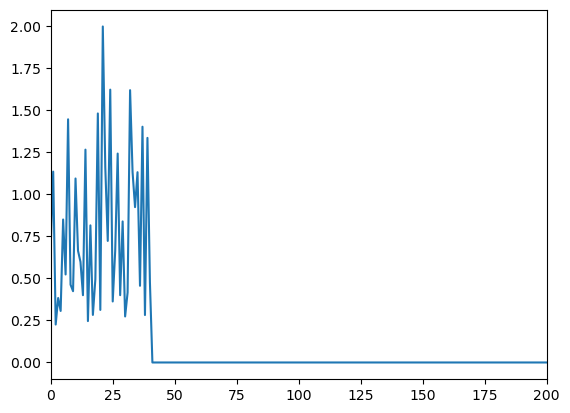

In [16]:
plt.plot(z[:, 1, :].max(axis=1));
plt.xlim([0, 200])